<a href="https://colab.research.google.com/github/shahd1995913/OCR-for-Chemistry/blob/main/replacment_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convert images in a folder to have a white background

# Plot Images where the h = 300 and w = 500

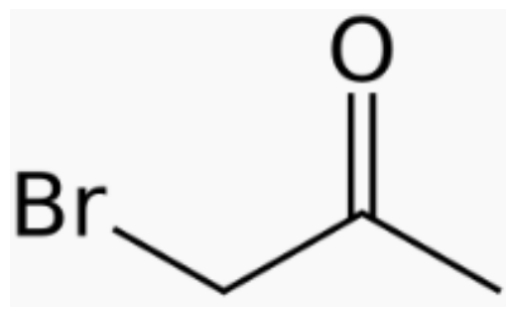

In [54]:
import matplotlib.pyplot as plt
import cv2

# Load the image
image = cv2.imread('/content/new.png')

# Resize the image to the desired size
resized_image = cv2.resize(image, (500, 300))

# Plot the image
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Optional: turn off the axis labels
plt.show()


In [ ]:
from PIL import Image
import os

def convert_to_white_background(input_folder, output_folder, target_size):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all the files in the input folder
    for filename in os.listdir(input_folder):
        # Check if the file is an image
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            # Open the image
            image_path = os.path.join(input_folder, filename)
            img = Image.open(image_path)

            # Resize the image to the target size
            resized_img = img.resize(target_size)

            # Create a new image with white background
            new_img = Image.new("RGB", target_size, "white")
            new_img.paste(resized_img, mask=resized_img.split()[3])  # Preserve transparency if present

            # Save the image with white background to the output folder
            output_path = os.path.join(output_folder, filename)
            new_img.save(output_path)

            print(f"Converted image: {output_path}")

# Specify the input and output folders
input_folder = "/content/test"
output_folder = "/content/test2"

# Specify the target size for the images
target_size = (500, 300)  # Width: 500, Height: 300

# Call the function to convert the images to have a white background and resize them
convert_to_white_background(input_folder, output_folder, target_size)


# Classification model to predict the class of the input image.

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Set the path to your dataset folder
data_dir = '/content/data_'

# Set the input image size
image_size = (400, 400)  # Update the width and height as desired

# Set the number of classes
num_classes = 3

# Load and preprocess the images
images = []
labels = []

for i in range(1, 4):
    image_path = f"{data_dir}/image0{i:02d}.png"  # Adjust the image file naming pattern if needed
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image)
    images.append(image_array)
    labels.append(i - 1)  # Assuming the labels are 0-based indices

# Convert the images and labels to NumPy arrays
images = tf.stack(images)
labels = tf.keras.utils.to_categorical(labels, num_classes)
# Old Model
# # Create the model
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# acc_model
# Create the model
model = Sequential()

# Add the convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))


# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(images, labels, epochs=20)

# Save the trained model
model.save('acc_model.h5')

Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 30.8594 - accuracy: 0.3333
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 1608.4980 - accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 4s 4s/step - loss: 201.5856 - accuracy: 0.6667
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 30.8198 - accuracy: 0.6667
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 70.5761 - accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 30.4194 - accuracy: 0.6667
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 9.6096 - accuracy: 0.6667
Epoch 8/20
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 3s 3s/step - loss: 19.1357 - accuracy: 0.6667
Epoch 10/20
1/1 [==============================] - 2s 2s/step - loss: 3.4588 - accuracy: 0.6667
Epoch 11/20
1/1 [==========

# Test New Image based on Model that Make the classifications

In [25]:
test_image_path = '/content/data_/image001.png'  # Replace with the path to your test image
test_image = load_img(test_image_path, target_size=image_size)
test_image_array = img_to_array(test_image)
test_image_array = tf.expand_dims(test_image_array, axis=0)  # Add an extra dimension for batch size
predictions = model.predict(test_image_array)
predicted_class = tf.argmax(predictions, axis=1).numpy()[0]
class_probability = predictions[0][predicted_class]

print(f"Predicted Class: {predicted_class+1}")
print(f"Probability: {class_probability}")

1/1 [==============================] - 0s 207ms/step
Predicted Class: 1
Probability: 1.0


# Object detecion

1/1 [==============================] - 0s 218ms/step


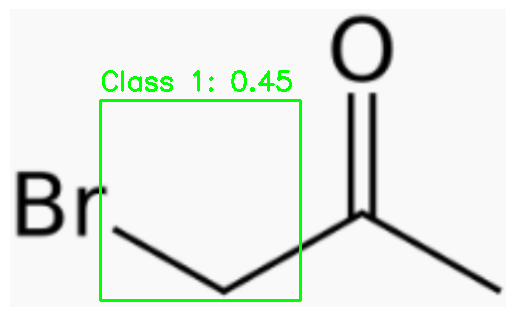

In [55]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

# Load the pre-trained image classification model
model = load_model('/content/acc_model.h5')

# Define the classes for your model
classes = ['Class 1', 'Class 2', 'Class 3']

# Preprocessing function
def preprocess_image(image):
    # Resize the image to the desired input size of your model
    input_width = 400  # Replace with the actual width your model expects
    input_height = 400  # Replace with the actual height your model expects
    resized_image = cv2.resize(image, (input_width, input_height))

    # Normalize the image
    normalized_image = resized_image / 255.0  # Assuming your model expects pixel values in the range [0, 1]

    # Return the preprocessed image
    return normalized_image

# Load and preprocess the image
image = cv2.imread('/content/download.png')
processed_image = preprocess_image(image)

# Perform object detection
predictions = model.predict(np.expand_dims(processed_image, axis=0))

# Post-processing - Assuming your model outputs class probabilities for each object
objects = []
threshold = 0.3  # Minimum confidence threshold for considering an object
class_index = np.argmax(predictions[0])  # Find the index of the predicted class with the highest probability
confidence = predictions[0][class_index]  # Get the confidence score for the predicted class
if confidence > threshold:
    class_name = classes[class_index]
    objects.append((class_name, confidence))

# Visualization
for object in objects:
    class_name, confidence = object
    text = f'{class_name}: {confidence:.2f}'

    # Replace x, y, w, and h with the actual bounding box coordinates
    x = 100
    y = 100
    w = 200
    h = 200

    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image
cv2_imshow(image)

1/1 [==============================] - 0s 236ms/step


error: ignored

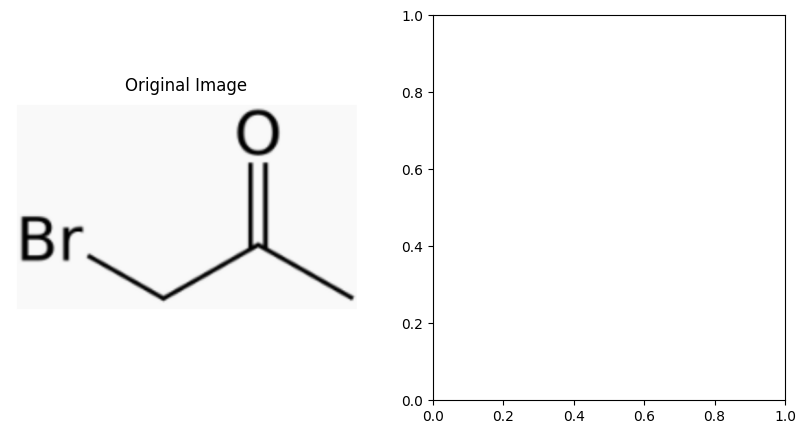

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the pre-trained image classification model
model = load_model('/content/acc_model.h5')

# Define the classes for your model
classes = ['Class 1', 'Class 2', 'Class 3']

# Preprocessing function
def preprocess_image(image):
    # Resize the image to the desired input size of your model
    input_width = 400  # Replace with the actual width your model expects
    input_height = 400  # Replace with the actual height your model expects
    resized_image = cv2.resize(image, (input_width, input_height))

    # Normalize the image
    normalized_image = resized_image / 255.0  # Assuming your model expects pixel values in the range [0, 1]

    # Return the preprocessed image
    return normalized_image

# Load and preprocess the image
image = cv2.imread('/content/download.png')
processed_image = preprocess_image(image)

# Perform object detection
predictions = model.predict(np.expand_dims(processed_image, axis=0))

# Post-processing - Assuming your model outputs class probabilities for each object
objects = []
threshold = 0.2  # Minimum confidence threshold for considering an object
class_index = np.argmax(predictions[0])  # Find the index of the predicted class with the highest probability
confidence = predictions[0][class_index]  # Get the confidence score for the predicted class
if confidence > threshold:
    class_name = classes[class_index]
    objects.append((class_name, confidence))

# Visualization
for object in objects:
    class_name, confidence = object
    text = f'{class_name}: {confidence:.2f}'

    # Replace x, y, w, and h with the actual bounding box coordinates
    x = 100
    y = 100
    w = 200
    h = 200

    # Create a new image to replace the detected region
    new_image = cv2.imread('/content/replacment_folder/product.png')  # Replace with the path to your new image
    new_image = cv2.resize(new_image, (w, h))

    # Replace the detected region with the new image
    processed_image[y:y+h, x:x+w] = new_image

    cv2.putText(processed_image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    cv2.rectangle(processed_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Plotting the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Modified Image')
axes[1].axis('off')
plt.show()


1/1 [==============================] - 0s 339ms/step


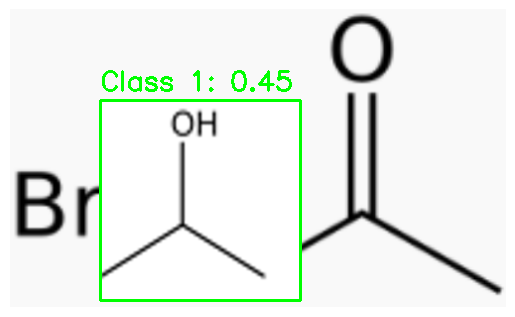

In [57]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

# Load the pre-trained image classification model
model = load_model('/content/acc_model.h5')

# Define the classes for your model
classes = ['Class 1', 'Class 2', 'Class 3']

# Preprocessing function
def preprocess_image(image):
    # Resize the image to the desired input size of your model
    input_width = 400  # Replace with the actual width your model expects
    input_height = 400  # Replace with the actual height your model expects
    resized_image = cv2.resize(image, (input_width, input_height))

    # Normalize the image
    normalized_image = resized_image / 255.0  # Assuming your model expects pixel values in the range [0, 1]

    # Return the preprocessed image
    return normalized_image

# Load and preprocess the image
image = cv2.imread('/content/download.png')
processed_image = preprocess_image(image)

# Perform object detection
predictions = model.predict(np.expand_dims(processed_image, axis=0))

# Post-processing - Assuming your model outputs class probabilities for each object
objects = []
threshold = 0.2  # Minimum confidence threshold for considering an object
class_index = np.argmax(predictions[0])  # Find the index of the predicted class with the highest probability
confidence = predictions[0][class_index]  # Get the confidence score for the predicted class
if confidence > threshold:
    class_name = classes[class_index]
    objects.append((class_name, confidence))

# Visualization
for object in objects:
    class_name, confidence = object
    text = f'{class_name}: {confidence:.2f}'

    # Replace x, y, w, and h with the actual bounding box coordinates
    x = 100
    y = 100
    w = 200
    h = 200
    # Replace the detected region with a new image
    new_image_path = '/content/replacment_folder/product.png'
    if new_image is not None:
        new_image = cv2.resize(new_image, (w, h))
        image[y:y+h, x:x+w] = new_image

    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image
cv2_imshow(image)

In [58]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the pre-trained image classification model
model = load_model('/content/acc_model.h5')

# Define the classes for your model
classes = ['Class 1', 'Class 2', 'Class 3']

# Preprocessing function
def preprocess_image(image):
    # Resize the image to the desired input size of your model
    input_width = 400  # Replace with the actual width your model expects
    input_height = 400  # Replace with the actual height your model expects
    resized_image = cv2.resize(image, (input_width, input_height))

    # Normalize the image
    normalized_image = resized_image / 255.0  # Assuming your model expects pixel values in the range [0, 1]

    # Return the preprocessed image
    return normalized_image

# Load and preprocess the image
image = cv2.imread('/content/download.png')
processed_image = preprocess_image(image)

# Perform object detection
predictions = model.predict(np.expand_dims(processed_image, axis=0))

# Post-processing - Assuming your model outputs class probabilities for each object
objects = []
threshold = 0.2  # Minimum confidence threshold for considering an object
class_index = np.argmax(predictions[0])  # Find the index of the predicted class with the highest probability
confidence = predictions[0][class_index]  # Get the confidence score for the predicted class
if confidence > threshold:
    class_name = classes[class_index]
    objects.append((class_name, confidence))

# Visualization
for object in objects:
    class_name, confidence = object
    text = f'{class_name}: {confidence:.2f}'

    # Replace x, y, w, and h with the actual bounding box coordinates
    x = 100
    y = 100
    w = 200
    h = 200

    # Replace the detected region with a new image
    new_image = cv2.imread('/content/replacment_folder/product.png')
    new_image = cv2.resize(new_image, (w, h))
    image[y:y+h, x:x+w] = new_image

    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

1/1 [==============================] - 0s 225ms/step


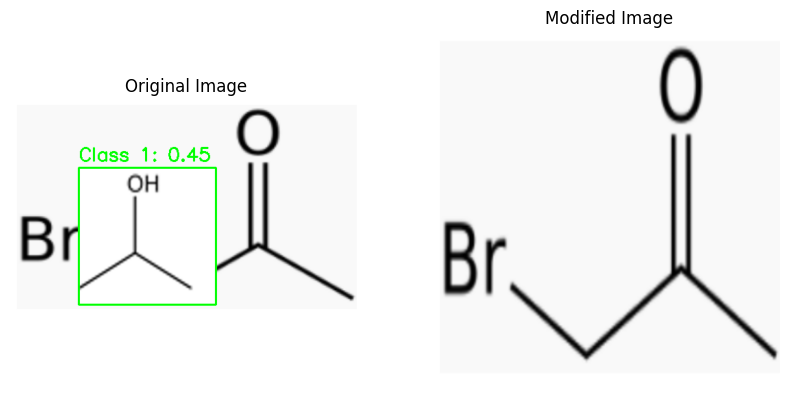

In [59]:
# Convert the processed image to 8-bit unsigned integer
processed_image = (processed_image * 255).astype(np.uint8)

# Plotting the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Modified Image')
axes[1].axis('off')
plt.show()

1/1 [==============================] - 0s 216ms/step


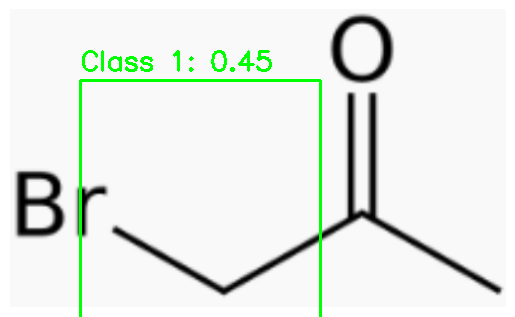

In [60]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

# Load the pre-trained image classification model
model = load_model('/content/acc_model.h5')

# Define the classes for your model
classes = ['Class 1', 'Class 2', 'Class 3']

# Preprocessing function
def preprocess_image(image):
    # Resize the image to the desired input size of your model
    input_width = 400  # Replace with the actual width your model expects
    input_height = 400  # Replace with the actual height your model expects
    resized_image = cv2.resize(image, (input_width, input_height))

    # Normalize the image
    normalized_image = resized_image / 255.0  # Assuming your model expects pixel values in the range [0, 1]

    # Return the preprocessed image
    return normalized_image

# Load and preprocess the image
image = cv2.imread('/content/download.png')
processed_image = preprocess_image(image)

# Perform object detection
predictions = model.predict(np.expand_dims(processed_image, axis=0))

# Post-processing - Assuming your model outputs class probabilities for each object
objects = []
threshold = 0.2  # Minimum confidence threshold for considering an object
class_index = np.argmax(predictions[0])  # Find the index of the predicted class with the highest probability
confidence = predictions[0][class_index]  # Get the confidence score for the predicted class
if confidence > threshold:
    class_name = classes[class_index]
    objects.append((class_name, confidence))

# Visualization
for object in objects:
    class_name, confidence = object
    text = f'{class_name}: {confidence:.2f}'

    # Replace x, y, w, and h with the actual bounding box coordinates
    x = 100
    y = 100
    w = 200
    h = 200

    # Calculate the center coordinates of the bounding box
    x_center = x + w // 2
    y_center = y + h // 2

    # Calculate the new bounding box coordinates based on the center
    new_w = int(w * 1.2)  # Increase the width by 20%
    new_h = int(h * 1.2)  # Increase the height by 20%
    new_x = x_center - new_w // 2
    new_y = y_center - new_h // 2

    cv2.putText(image, text, (new_x, new_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    cv2.rectangle(image, (new_x, new_y), (new_x + new_w, new_y + new_h), (0, 255, 0), 2)

# Display the image
cv2_imshow(image)


1/1 [==============================] - 0s 223ms/step


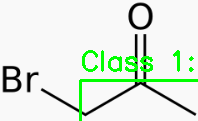

In [50]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

# Load the pre-trained image classification model
model = load_model('/content/acc_model.h5')

# Define the classes for your model
classes = ['Class 1', 'Class 2', 'Class 3']

# Preprocessing function
def preprocess_image(image):
    # Resize the image to the desired input size of your model
    input_width = 400  # Replace with the actual width your model expects
    input_height = 400  # Replace with the actual height your model expects
    resized_image = cv2.resize(image, (input_width, input_height))

    # Normalize the image
    normalized_image = resized_image / 255.0  # Assuming your model expects pixel values in the range [0, 1]

    # Return the preprocessed image
    return normalized_image

# Load and preprocess the image
image = cv2.imread('/content/new.png')
processed_image = preprocess_image(image)

# Perform object detection
predictions = model.predict(np.expand_dims(processed_image, axis=0))

# Post-processing - Assuming your model outputs class probabilities for each object
objects = []
threshold = 0.2  # Minimum confidence threshold for considering an object
class_index = np.argmax(predictions[0])  # Find the index of the predicted class with the highest probability
confidence = predictions[0][class_index]  # Get the confidence score for the predicted class
if confidence > threshold:
    class_name = classes[class_index]
    objects.append((class_name, confidence))

# Visualization
for object in objects:
    class_name, confidence = object
    text = f'{class_name}: {confidence:.2f}'

    # Replace x, y, w, and h with the actual bounding box coordinates
    x = 100
    y = 100
    w = 200
    h = 200

    # Calculate the center coordinates of the bounding box
    x_center = x + w // 2
    y_center = y + h // 2

    # Calculate the new bounding box coordinates based on the center
    new_w = int(w * 1.2)  # Increase the width by 20%
    new_h = int(h * 1.2)  # Increase the height by 20%
    new_x = x_center - new_w // 2
    new_y = y_center - new_h // 2

    cv2.putText(image, text, (new_x, new_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    cv2.rectangle(image, (new_x, new_y), (new_x + new_w, new_y + new_h), (0, 255, 0), 2)

# Display the image
cv2_imshow(image)

1/1 [==============================] - 0s 219ms/step


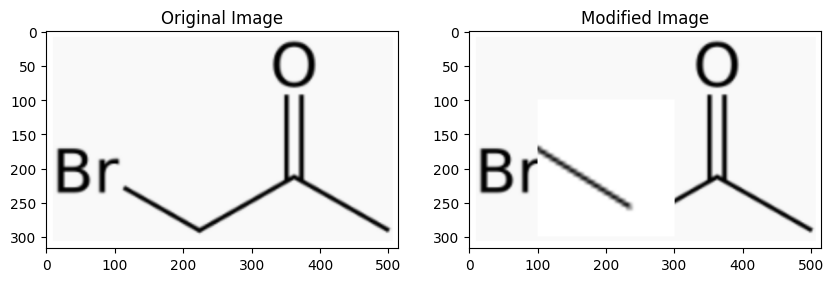

In [61]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the pre-trained image classification model (assuming you have one)
model = tf.keras.models.load_model('/content/acc_model.h5')

# Step 2: Load the new image that you want to use as a replacement
# Replace 'path_to_new_image' with the path to your new image.
new_image = cv2.imread('/content/replacment_folder/product.png')
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

# Step 3: Load the original image you want to modify
original_image = cv2.imread('/content/download.png')
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Step 4: Use the image classification model to predict the class of the original image
# Replace 'input_size' with the input size that your model expects.
input_size = (400, 400)
resized_image = cv2.resize(original_image, input_size)
resized_image = np.expand_dims(resized_image, axis=0)
predicted_class = np.argmax(model.predict(resized_image)[0])

# Step 5: Identify the specific part of the image that you want to replace (you need to implement this part)
# For simplicity, we assume that you have a function called 'identify_part' that returns the coordinates of the identified part.
# Replace 'identify_part' with your implementation.

def identify_part(image, predicted_class):
    # Implement your logic to identify the part of the image you want to replace.
    # You can use object detection, segmentation, or any other method suitable for your specific task.
    # For demonstration purposes, we assume you already have the coordinates of the identified part.
    # For simplicity, let's assume you have identified a square region.
    x1, y1, x2, y2 = 100, 100, 300, 300
    return x1, y1, x2, y2

x1, y1, x2, y2 = identify_part(original_image, predicted_class)

# Step 6: Replace the identified part of the original image with the corresponding part from the new image
modified_image = original_image.copy()

# Ensure the replacement part has the same dimensions as the region to be replaced


# Ensure the replacement part has the same dimensions as the region to be replaced
replacement_part = new_image[y1:y2, x1:x2]
if replacement_part.size > 0:
    replacement_part = cv2.resize(replacement_part, (x2 - x1, y2 - y1)[::-1])  # Reverse the dimensions

    modified_image[y1:y2, x1:x2] = replacement_part
else:
    print("Replacement part is empty. Skipping replacement.")

# Step 7: Plot the resulting image with the replaced part
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(modified_image)
plt.title("Modified Image")

plt.show()

# Part 3 Without use AI

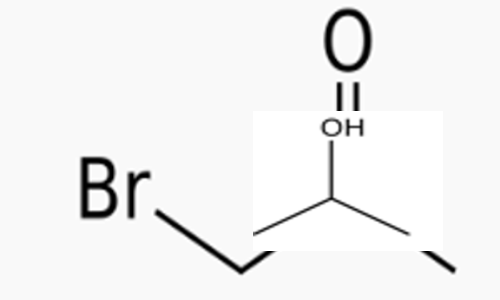

In [70]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/test_images/testimages.png')

# Define the object to detect and its replacement
object_to_detect = cv2.imread('/content/data_/image001.png')
object_to_replace = cv2.imread('/content/replacment_folder/product.png')

# Convert the images to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_object = cv2.cvtColor(object_to_detect, cv2.COLOR_BGR2GRAY)

# Perform object detection
result = cv2.matchTemplate(gray_image, gray_object, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + object_to_detect.shape[1], top_left[1] + object_to_detect.shape[0])

# Resize the replacement object to match the dimensions of the region to be replaced
object_to_replace_resized = cv2.resize(object_to_replace, (bottom_right[0] - top_left[0], bottom_right[1] - top_left[1]))

# Replace the detected object with the resized replacement object
image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = object_to_replace_resized

# Display the modified image
cv2_imshow(image)


# New Section

In [81]:
import cv2
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Define the path to the folders containing training images
object_to_detect_folder = '/content/data_'
object_to_replace_folder = '/content/replacment_folder'

# Define the input dimensions for your model
input_width = 224
input_height = 224

# Load and preprocess the training images
object_to_detect_images = []
for filename in os.listdir(object_to_detect_folder):
    image_path = os.path.join(object_to_detect_folder, filename)
    if os.path.isfile(image_path):
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, (input_width, input_height))
            object_to_detect_images.append(image)
        else:
            print(f"Failed to read image: {image_path}")
    else:
        print(f"Skipped directory: {image_path}")


# Load and preprocess the replacement images
object_to_replace_images = []
for filename in os.listdir(object_to_replace_folder):
    image = cv2.imread(os.path.join(object_to_replace_folder, filename))
    image = cv2.resize(image, (input_width, input_height))
    object_to_replace_images.append(image)
object_to_replace_images = np.array(object_to_replace_images)

# Perform one-hot encoding on the target output
num_classes = object_to_replace_images.shape[0]
object_to_replace_labels = np.arange(num_classes)
object_to_replace_labels_one_hot = to_categorical(object_to_replace_labels, num_classes)

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(input_height, input_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(object_to_detect_images, object_to_replace_labels_one_hot, epochs=10)

# Save the trained model
model.save('object_detection_model.h5')


Skipped directory: /content/data_/.ipynb_checkpoints


ValueError: ignored

In [85]:
import cv2
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Define the path to the folders containing training images
object_to_detect_folder = '/content/data_'
object_to_replace_folder = '/content/replacment_folder'

# Define the input dimensions for your model
input_width = 224
input_height = 224

# Load and preprocess the training images
object_to_detect_images = []
for filename in os.listdir(object_to_detect_folder):
    image = cv2.imread(os.path.join(object_to_detect_folder, filename))
    if image is not None:  # Check if the loaded file is an image
        image = cv2.resize(image, (input_width, input_height))
        object_to_detect_images.append(image)
object_to_detect_images = np.array(object_to_detect_images)

# Load and preprocess the replacement images
object_to_replace_images = []
for filename in os.listdir(object_to_replace_folder):
    image = cv2.imread(os.path.join(object_to_replace_folder, filename))
    if image is not None:  # Check if the loaded file is an image
        image = cv2.resize(image, (input_width, input_height))
        object_to_replace_images.append(image)
object_to_replace_images = np.array(object_to_replace_images)

# Make sure the number of samples matches
if len(object_to_detect_images) != len(object_to_replace_images):
    raise ValueError("The number of samples in object_to_detect_images and object_to_replace_images must be the same.")

# Define the number of classes (in your case, 1 for the replacement object)
num_classes = 3

# Prepare the target data (labels) in one-hot encoded format
object_to_replace_labels = np.ones(len(object_to_replace_images))  # 1 for the replacement object
object_to_replace_labels_one_hot = to_categorical(object_to_replace_labels, num_classes)

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(input_height, input_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(object_to_detect_images, object_to_replace_labels_one_hot, epochs=10)

# Save the trained model
model.save('object_detection_model.h5')


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 112.4353 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 621ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 1s 757ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 1s 711ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 1s 724ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 592ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 445ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 1s 502ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 534ms/step - loss: 0.0000e+00 - 

In [110]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('object_detection_model.h5')

# Load and preprocess the new image
new_image = cv2.imread('/content/test_images/testimages.png')
processed_image = preprocess_image(new_image)  # Use your own preprocess_image function

# Resize the processed image to the expected input size of the model
resized_image = cv2.resize(processed_image, (224, 224))

# Perform object detection using the trained model
object_classes = ['class1', 'class2', 'class3']  # Replace with your class labels
object_detection_result = model.predict(np.expand_dims(resized_image, axis=0))

# Define the confidence threshold for object detection
confidence_threshold = 0.5  # Adjust the value as needed

# Check if the object is detected above the confidence threshold
if np.max(object_detection_result) > confidence_threshold:
    # Get the index of the predicted class with the highest probability
    predicted_class_index = np.argmax(object_detection_result)

    # Get the class label of the predicted object
    predicted_class_label = object_classes[predicted_class_index]

    # Check the format of the object detection result
    if isinstance(object_detection_result, list):
        bounding_box = object_detection_result[0][predicted_class_index]
    elif isinstance(object_detection_result, np.ndarray):
        bounding_box = object_detection_result[0, predicted_class_index]
    else:
        raise TypeError("Unexpected format of object detection result")

    print("Bounding Box Format:", type(bounding_box))
    print("Object Detection Result:", object_detection_result)

    # Convert the bounding box to a list or numpy array if it is a scalar value
    if np.isscalar(bounding_box):
        bounding_box = [bounding_box]

    # Convert the coordinates from relative values to absolute pixel values
    image_height, image_width, _ = new_image.shape

    # Handle different bounding box formats
    if isinstance(bounding_box, np.ndarray) and len(bounding_box) == 1:
        bounding_box = bounding_box[0]
        y_min, x_min, y_max, x_max = bounding_box
    elif isinstance(bounding_box, list) and len(bounding_box) == 4:
        y_min, x_min, y_max, x_max = bounding_box
    else:
        raise ValueError("Invalid bounding box format")

    y_min = int(y_min * image_height)
    x_min = int(x_min * image_width)
    y_max = int(y_max * image_height)
    x_max = int(x_max * image_width)

    # Draw a rectangle around the detected object
    cv2.rectangle(new_image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    # Display the predicted class
    cv2.putText(new_image, predicted_class_label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the modified image with the bounding box and predicted class
cv2.imshow('Modified Image', new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


1/1 [==============================] - 0s 110ms/step
Bounding Box Format: <class 'numpy.float32'>
Object Detection Result: [[0. 1. 0.]]


ValueError: ignored

In [111]:
import cv2
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Define the path to the folders containing training images
object_to_detect_folder = '/content/data_'
object_to_replace_folder = '/content/replacment_folder'

# Define the input dimensions for your model
input_width = 224
input_height = 224

# Load and preprocess the training images
object_to_detect_images = []
for filename in os.listdir(object_to_detect_folder):
    image = cv2.imread(os.path.join(object_to_detect_folder, filename))
    if image is not None:  # Check if the loaded file is an image
        image = cv2.resize(image, (input_width, input_height))
        object_to_detect_images.append(image)
object_to_detect_images = np.array(object_to_detect_images)

# Load and preprocess the replacement images
object_to_replace_images = []
for filename in os.listdir(object_to_replace_folder):
    image = cv2.imread(os.path.join(object_to_replace_folder, filename))
    if image is not None:  # Check if the loaded file is an image
        image = cv2.resize(image, (input_width, input_height))
        object_to_replace_images.append(image)
object_to_replace_images = np.array(object_to_replace_images)

# Make sure the number of samples matches
if len(object_to_detect_images) != len(object_to_replace_images):
    raise ValueError("The number of samples in object_to_detect_images and object_to_replace_images must be the same.")

# Define the number of classes (in your case, 1 for the replacement object)
num_classes = 3

# Prepare the target data (labels) in one-hot encoded format
object_to_replace_labels = np.ones(len(object_to_replace_images))  # 1 for the replacement object
object_to_replace_labels_one_hot = to_categorical(object_to_replace_labels, num_classes)

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(input_height, input_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(object_to_detect_images, object_to_replace_labels_one_hot, epochs=10)

# Save the trained model
model.save('object_detection_model.h5')


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 150.6651 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 461ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 497ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 450ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 1s 618ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 757ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 736ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 1s 809ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 1s 529ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 91ms/step


DisabledFunctionError: ignored

1/1 [==============================] - 0s 122ms/step


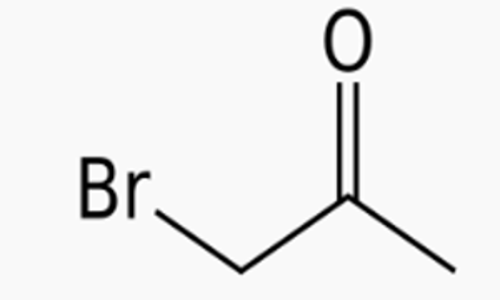

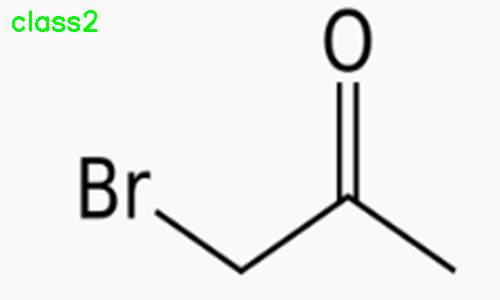

In [113]:
from google.colab.patches import cv2_imshow

model = load_model('object_detection_model.h5')

# Load and preprocess the new image
new_image = cv2.imread('/content/test_images/testimages.png')
processed_image = cv2.resize(new_image, (input_width, input_height))

# Perform object detection using the trained model
object_detection_result = model.predict(np.expand_dims(processed_image, axis=0))

# Define the confidence threshold for object detection
confidence_threshold = 0.5

# Check if the object is detected above the confidence threshold
if np.max(object_detection_result) > confidence_threshold:
    # Get the index of the predicted class with the highest probability
    predicted_class_index = np.argmax(object_detection_result)

    # Get the class label of the predicted object
    predicted_class_label = object_classes[predicted_class_index]

    # Display the input image
    cv2_imshow(new_image)
    cv2.waitKey(0)

# Display the output image with the predicted class
    cv2.putText(new_image, predicted_class_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    cv2_imshow(new_image)
    cv2.waitKey(0)


cv2.destroyAllWindows()


1/1 [==============================] - 0s 160ms/step


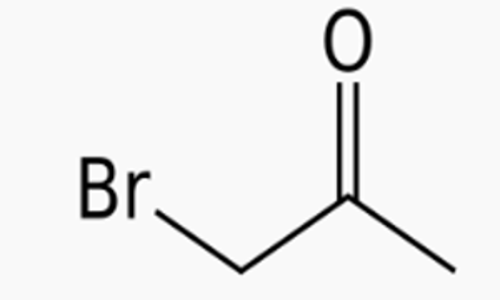

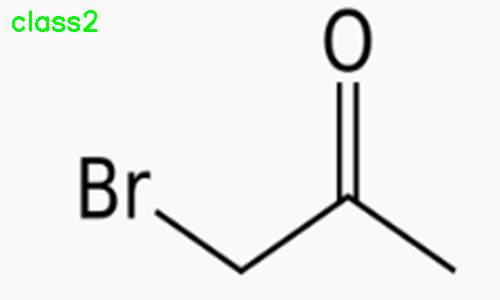

In [114]:
from google.colab.patches import cv2_imshow

# Load the trained model
model = load_model('object_detection_model.h5')

# Load and preprocess the new image
new_image = cv2.imread('/content/test_images/testimages.png')
processed_image = cv2.resize(new_image, (input_width, input_height))

# Perform object detection using the trained model
object_detection_result = model.predict(np.expand_dims(processed_image, axis=0))

# Define the confidence threshold for object detection
confidence_threshold = 0.5

# Check if the object is detected above the confidence threshold
if np.max(object_detection_result) > confidence_threshold:
    # Get the index of the predicted class with the highest probability
    predicted_class_index = np.argmax(object_detection_result)

    # Get the class label of the predicted object
    predicted_class_label = object_classes[predicted_class_index]

    # Display the input image
    cv2_imshow(new_image)

    # Display the output image with the predicted class
    output_image = new_image.copy()
    cv2.putText(output_image, predicted_class_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    cv2_imshow(output_image)

cv2.destroyAllWindows()
